# Master I Informatique
## Intelligence Artificielle
### Introduction au Deep Learning - CNN

Dans ce note book, nous allons utiliser keras pour concevoir et entrainer un réseau de neurones avec une architecture CNN.

La chargement, le découpage et en général le prétraitement des données reste le même. Ce qui change essentiellement c'est l'architecture du réseau.

In [2]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#To input our values in our network Conv2D layer, we need to reshape the datasets, i.e.,
# pass from (60000, 28, 28) to (60000, 28, 28, 1) where 1 is the number of channels of our images
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = Y_train.astype('float32')
Y_test = Y_test.astype('float32')
X_train  = X_train / 255
X_test  = X_test / 255

La commence réellement l'utilisation des CNN. Nous avons besoin d'importer un certain nombre d'autres éléments de la bibliothèque keras :

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

Et on définit notre réseau :

In [6]:
num_classes = 10

#Convert class vectors to binary class matrices ("one hot encoding")
## Doc : https://keras.io/utils/#to_categorical
Y_train = keras.utils.np_utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.np_utils.to_categorical(Y_test, num_classes)

In [7]:
def cnn():
    model = Sequential()
    model.add(Conv2D(32,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=(28, 28, 1)))
    model.add(Conv2D(64,
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

On créee donc notre réseau :

In [8]:
model = cnn()
model.summary()

2021-12-01 16:05:19.342026: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

et on l'antraine :

In [9]:
batch_size=64
epochs=5

hist = model.fit(X_train, Y_train,
            validation_data=(X_test, Y_test),
            epochs=epochs,
            batch_size=batch_size)

Epoch 1/5
938/938 [==============================] - 60s 64ms/step - loss: 0.1252 - accuracy: 0.9619 - val_loss: 0.0418 - val_accuracy: 0.9862
Epoch 2/5
938/938 [==============================] - 62s 67ms/step - loss: 0.0389 - accuracy: 0.9877 - val_loss: 0.0406 - val_accuracy: 0.9874
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0328 - val_accuracy: 0.9892
Epoch 4/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0369 - val_accuracy: 0.9900
Epoch 5/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0365 - val_accuracy: 0.9880


Test loss:  0.03648752346634865
Test accuracy:  0.9879999756813049


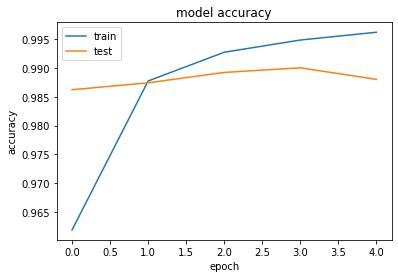

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])
#plot accuracies
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()